# Análise exploratória dos dados

In [85]:
import jsonlines
import json
import re
from tqdm import tqdm
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from text_cleaner import clean_text
import matplotlib.pyplot as plt

### Métodos para ler os dados e plotar o gráfico (len x count)

In [86]:
def read_registers_file(path, acordaos_year):
    with jsonlines.open(path) as reader:
        for obj in tqdm(reader):
            acordaos_year.append({
                'ementa': clean_text(obj['ementa']),
                'inteiro_teor': clean_text(obj['inteiro_teor'])
            })

In [90]:
def generate_count(registers, len_count):
    for acordao in registers:
        key = int(len(acordao['ementa']) / 100)
        if key in len_count.keys():
            len_count[key] = len_count[key] + 1
        else:
            len_count[key] = 1

In [89]:
def write_count_file(filename, data):
    with open(filename, 'w') as writer:
        write_data = json.dumps(data)
        writer.write(write_data)

In [91]:
def generate_graph(len_count):
    to_df = { 'len': [l * 100 for l in len_count.keys()], 'count': list(len_count.values()) }
    df = pd.DataFrame.from_dict(to_df)
    plt.figure(figsize=(20, 10))
    sns.barplot(y='count', x='len', data=df[:30], palette='Greens_d')

#### Acórdãos de 2010

In [82]:
acordaos_2010 = []
read_registers_file('data/parsed_registers/2010.jsonl', acordaos_2010)

In [94]:
len_count_2010 = {}
generate_count(acordaos_2010, len_count_2010)

In [96]:
write_count_file('data/len_count/2010_count.json', len_count_2010)

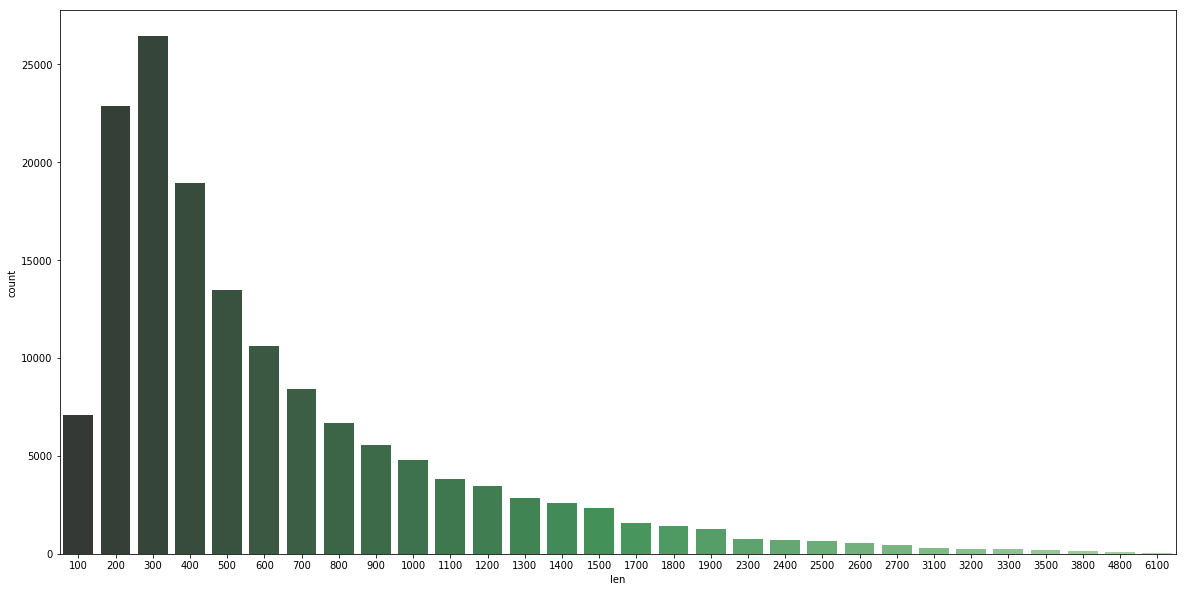

In [97]:
generate_graph(len_count_2010)

#### Acórdãos 2011

In [ ]:
acordaos_2011 = []
read_registers_file('data/parsed_registers/2011.jsonl', acordaos_2011)

In [4]:
len_count_2011 = {}
generate_count(acordaos_2011, len_count_2011)

In [8]:
write_count_file('data/len_count/2011_count.json', len_count_2011)

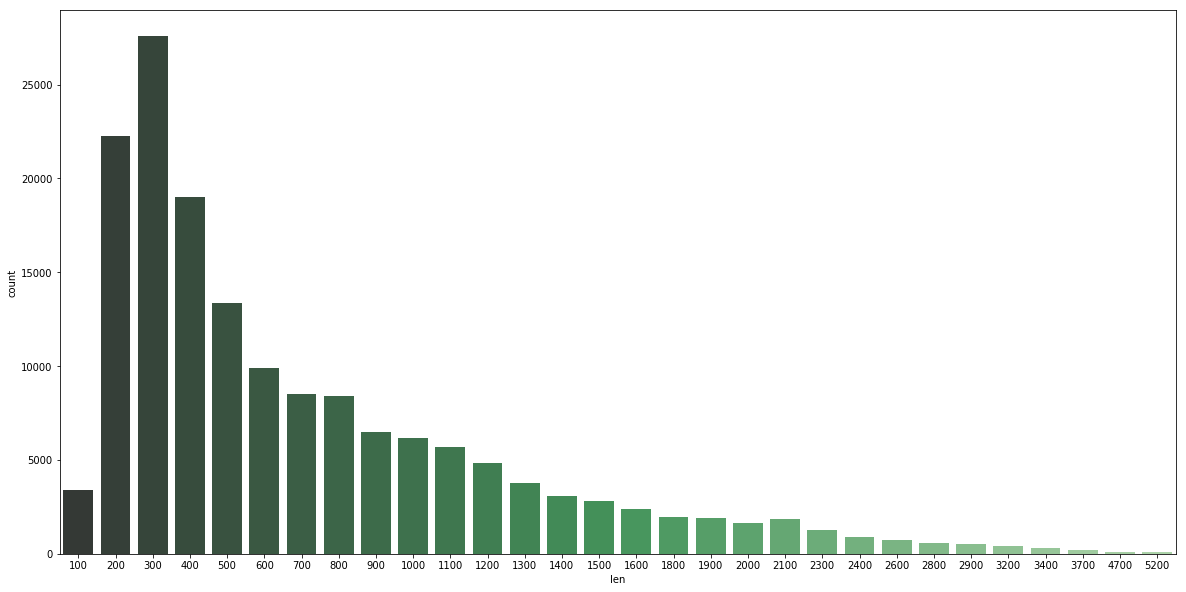

In [13]:
generate_graph(len_count_2011)

#### Acórdãos 2012

In [22]:
acordaos_2012 = []
read_registers_file('data/parsed_registers/2012.jsonl', acordaos_2012)

146400it [10:04, 242.24it/s]


In [25]:
len_count_2012 = {}
generate_count(acordaos_2012, len_count_2012)

In [26]:
write_count_file('2012_count.json', len_count_2012)

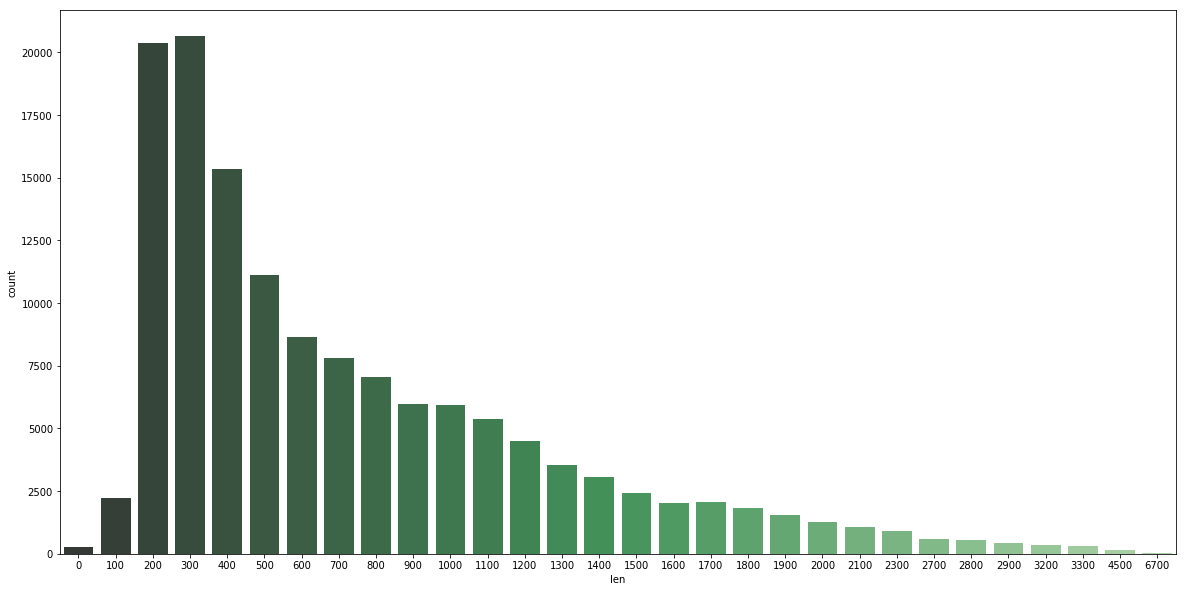

In [27]:
generate_graph(len_count_2012)

#### Acórdãos 2013

In [8]:
acordaos_2013 = []
read_registers_file('data/parsed_registers/2013.jsonl', acordaos_2013)

167940it [13:25, 208.54it/s]


In [9]:
len_count_2013 = {}
generate_count(acordaos_2013, len_count_2013)

In [11]:
write_count_file('2013_count.json', len_count_2013)

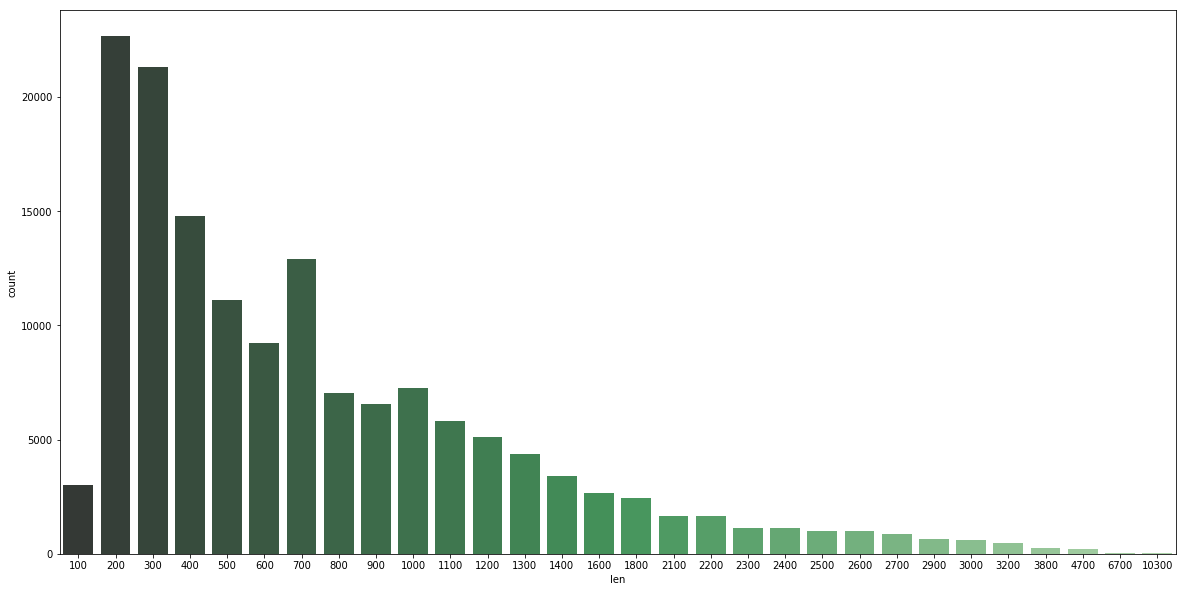

In [12]:
generate_graph(len_count_2013)

#### Acórdãos 2014

In [8]:
acordaos_2014 = []
read_registers_file('data/parsed_registers/2014.jsonl', acordaos_2014)

189303it [16:30, 191.15it/s]


In [13]:
len_count_2014 = {}
generate_count(acordaos_2014, len_count_2014)

In [14]:
write_count_file('2014_count.json', len_count_2014)

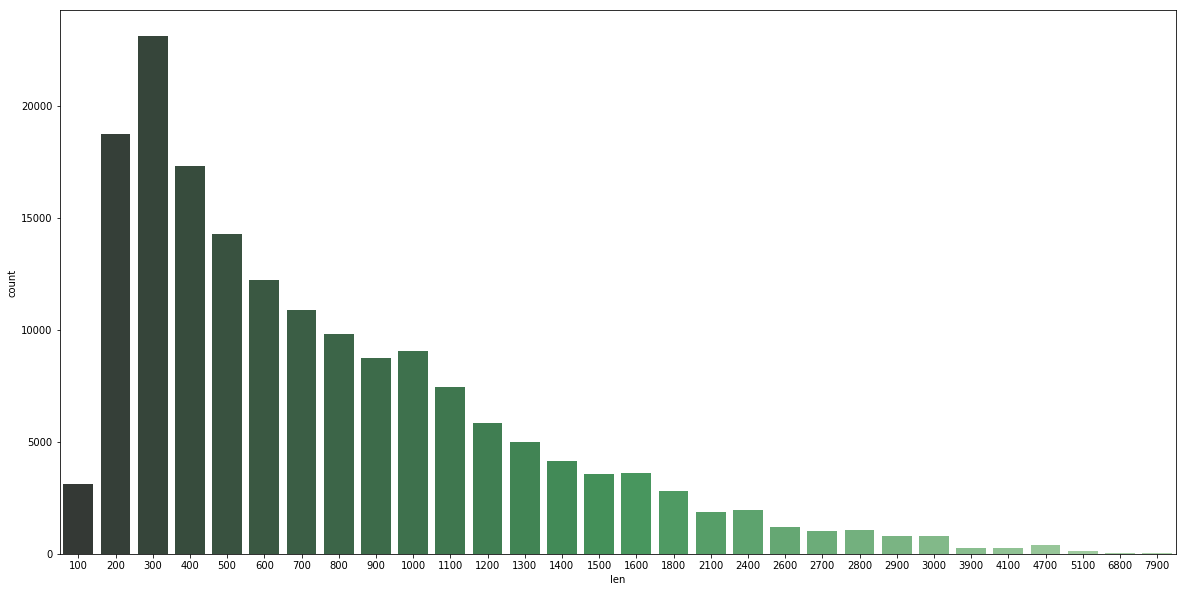

In [16]:
generate_graph(len_count_2014)

#### Acórdãos 2016

In [7]:
acordaos_2016 = []
read_registers_file('data/parsed_registers/2016.jsonl', acordaos_2016)

164771it [13:59, 196.17it/s] 


In [8]:
len_count_2016 = {}
generate_count(acordaos_2016, len_count_2016)

In [9]:
write_count_file('2016_count.json', len_count_2016)

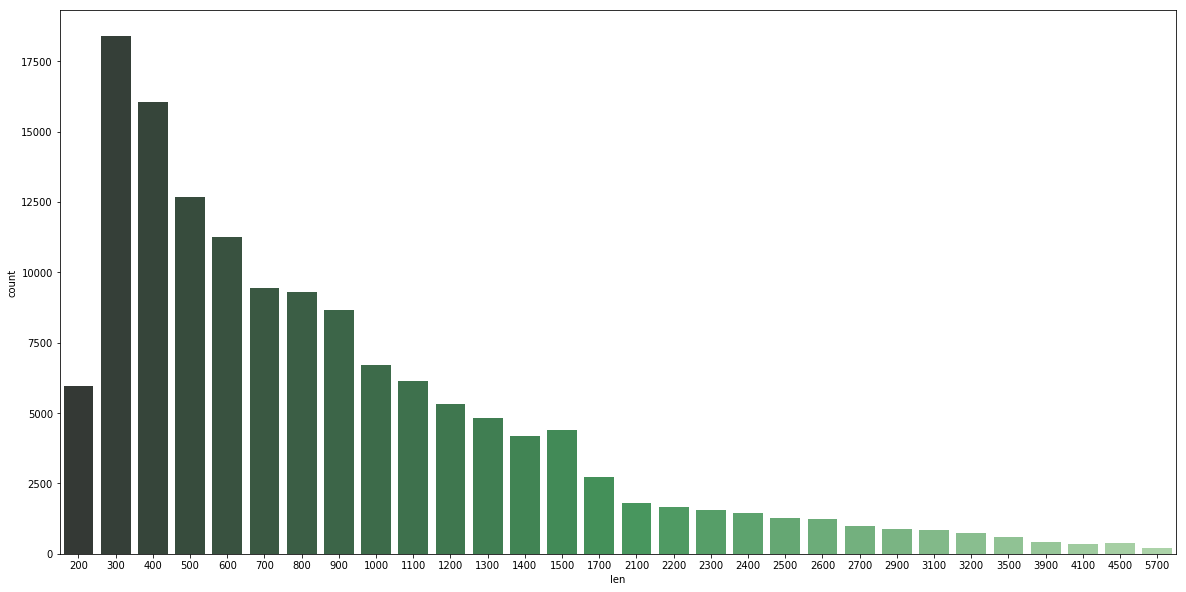

In [10]:
generate_graph(len_count_2016)

### Todos os anos

In [37]:
json_list = glob.glob('data/len_count/*.json')

In [52]:
final_len_count = {}
for file in json_list:
    try:
        with open(file, 'r') as f:
            data = json.load(f)
            for key in data.keys():
                formatted_key = key.zfill(4)
                if formatted_key in final_len_count.keys():
                    final_len_count[formatted_key] += data[key]
                else:
                    final_len_count[formatted_key] = data[key]
    except Exception as e:
        print(e)

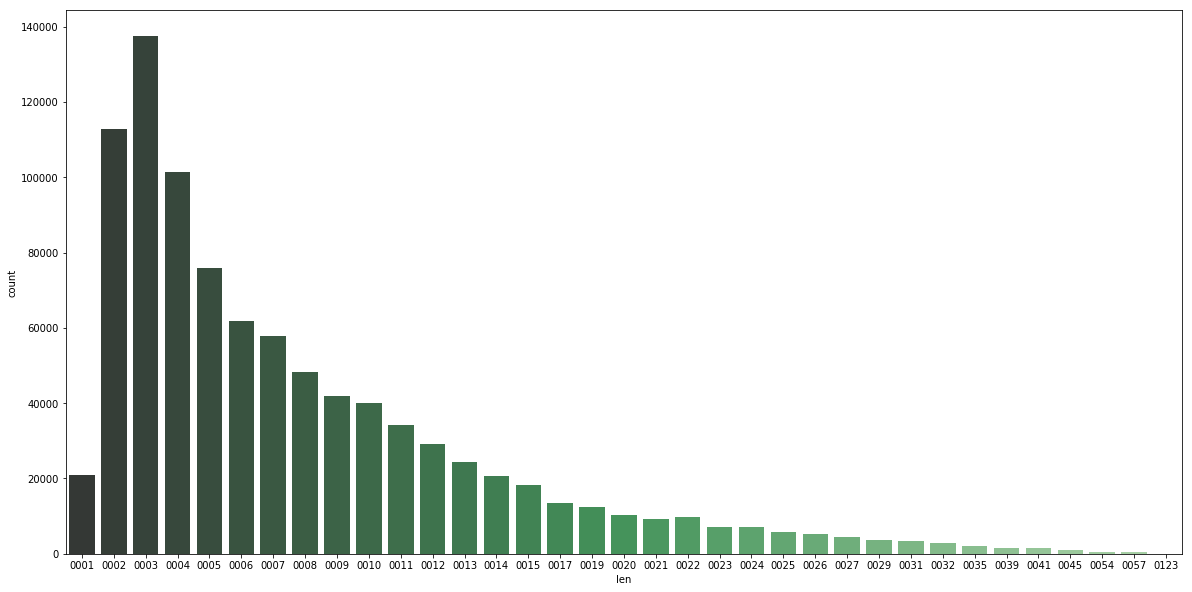

In [56]:
to_df = { 'len': list(final_len_count.keys()), 'count': list(final_len_count.values()) }
df = pd.DataFrame.from_dict(to_df)

plt.figure(figsize=(20, 10))
sns.barplot(y='count', x='len', data=df[:35], palette='Greens_d')

#### Total de acórdãos

In [57]:
registers_len = 0
for v in final_len_count.values():
    registers_len += v

In [104]:
print('Total de acórdãos:', registers_len)

Total de acórdãos: 997493


In [101]:
most_values = final_len_count['0002'] + final_len_count['0003'] + final_len_count['0004'] + final_len_count['0005'] + final_len_count['0006'] + final_len_count['0007'] + final_len_count['0008'] + final_len_count['0009'] + final_len_count['0010'] 

In [105]:
print('Tamanho de acórdãos mais recorrentes:', most_values)

Tamanho de acórdãos mais recorrentes: 677799


In [110]:
percentage = (most_values/registers_len) * 100
print('Porcentagem de acórdãos de tamanho entre 200 e 1099 caracteres:', round(percentage, 2), '%')

Porcentagem de acórdãos de tamanho entre 200 e 1099 caracteres: 67.95 %


### Gerando json com os resultados

In [111]:
with open('data/len_count/all_count.json', 'w') as writer:
    write_data = json.dumps(final_len_count)
    writer.write(write_data)